# PFAM Annotation Module

Este notebook demuestra el uso de los dos métodos principales del módulo `pfam_annotation.py` de pyMut.


## 1. Importar librerías y cargar datos


In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Añadir el directorio src al path para importar pyMut
sys.path.insert(0, '../../../src')

# Importar pyMut
from pyMut import read_maf
from pyMut.utils.database import build_embedded_db, connect_db

# Cargar datos de ejemplo
maf_file = "../../../src/pyMut/data/examples/tcga_laml_VEP_annotated.maf.gz"
maf_data = read_maf(maf_file)

# Configurar base de datos PFAM
try:
    build_embedded_db(force_rebuild=False)
except:
    pass


2025-07-17 20:57:34,597 | INFO | pyMut.input | Starting MAF reading: ../../../src/pyMut/data/examples/tcga_laml_VEP_annotated.maf.gz
2025-07-17 20:57:34,598 | INFO | pyMut.input | Loading from cache: ../../../src/pyMut/data/examples/.pymut_cache/tcga_laml_VEP_annotated.maf_66cd1176f63b89eb.parquet
2025-07-17 20:57:34,627 | INFO | pyMut.input | Cache loaded successfully in 0.03 seconds


✅ Database already exists at /home/luisruimore/Escritorio/TFG/docs/examples/analysis/../../../src/pyMut/data/resources/data.duckdb


## 2. Uso del método annotate_pfam()


In [2]:
# Anotar variantes con dominios PFAM
maf_data = maf_data.annotate_pfam()

# Mostrar ejemplos de anotaciones
if 'pfam_id' in maf_data.data.columns:
    pfam_examples = maf_data.data[
        maf_data.data['pfam_id'].notna()
    ][['Hugo_Symbol', 'Protein_Change', 'uniprot', 'aa_pos', 'pfam_id', 'pfam_name']].head(10)
    display(pfam_examples)


2025-07-17 20:57:41,776 | INFO | pyMut.analysis.pfam_annotation | UniProt resolution summary:
2025-07-17 20:57:41,776 | INFO | pyMut.analysis.pfam_annotation |    Total identifiers processed: 1,552
2025-07-17 20:57:41,777 | INFO | pyMut.analysis.pfam_annotation |    Direct accessions: 0
2025-07-17 20:57:41,777 | INFO | pyMut.analysis.pfam_annotation |    Resolved via short_name: 1,474
2025-07-17 20:57:41,777 | INFO | pyMut.analysis.pfam_annotation |    Resolved via external ID: 0
2025-07-17 20:57:41,778 | INFO | pyMut.analysis.pfam_annotation |    Unresolved: 78
2025-07-17 20:57:42,413 | INFO | pyMut.analysis.pfam_annotation | Variantes anotadas con PFAM: 1119/1958
2025-07-17 20:57:42,952 | INFO | pyMut.analysis.pfam_annotation | 
Final annotation summary:
2025-07-17 20:57:42,953 | INFO | pyMut.analysis.pfam_annotation |    Total variants processed: 2,207
2025-07-17 20:57:42,953 | INFO | pyMut.analysis.pfam_annotation |    UniProt identifiers resolved: 1,474/1,552
2025-07-17 20:57:42,9

,Hugo_Symbol,Protein_Change,uniprot,aa_pos,pfam_id,pfam_name
0,ABCA10,p.K960R,ABCAA_HUMAN,960.0,PF00028,PF00028
1,ABCA4,p.R1517H,ABCA4_HUMAN,1517.0,PF00028,PF00028
2,ABCB11,p.A1283V,ABCBB_HUMAN,1283.0,PF00028,PF00028
3,ABCC11,p.I490I,ABCCB_HUMAN,490.0,PF00028,PF00028
4,ABCC3,p.P1271S,MRP3_HUMAN,1271.0,PF00041,PF00041
5,ABCF1,p.G658S,ABCF1_HUMAN,658.0,PF00041,PF00041
6,ABCG4,p.Y567C,ABCG4_HUMAN,567.0,PF00041,PF00041
7,ABCG8,p.M208I,ABCG8_HUMAN,208.0,PF00057,PF00057
8,ABL1,p.P918L,ABL1_HUMAN,918.0,PF00071,PF00071
9,ACAN,p.S1756S,None,1756.0,PF00071,PF00071


## 3. Uso del método pfam_domains()


,pfam_id,pfam_name,n_genes,n_variants
62,PF00180,PF00180,36,36
453,PF16276,PF16276,31,32
327,PF07714,PF07714,22,29
32,PF00071,PF00071,28,29
405,PF13853,PF13853,12,25
15,PF00028,PF00028,16,20
31,PF00069,PF00069,17,19
0,PF00001,PF00001,17,18
18,PF00041,PF00041,15,16
105,PF00520,PF00520,12,16


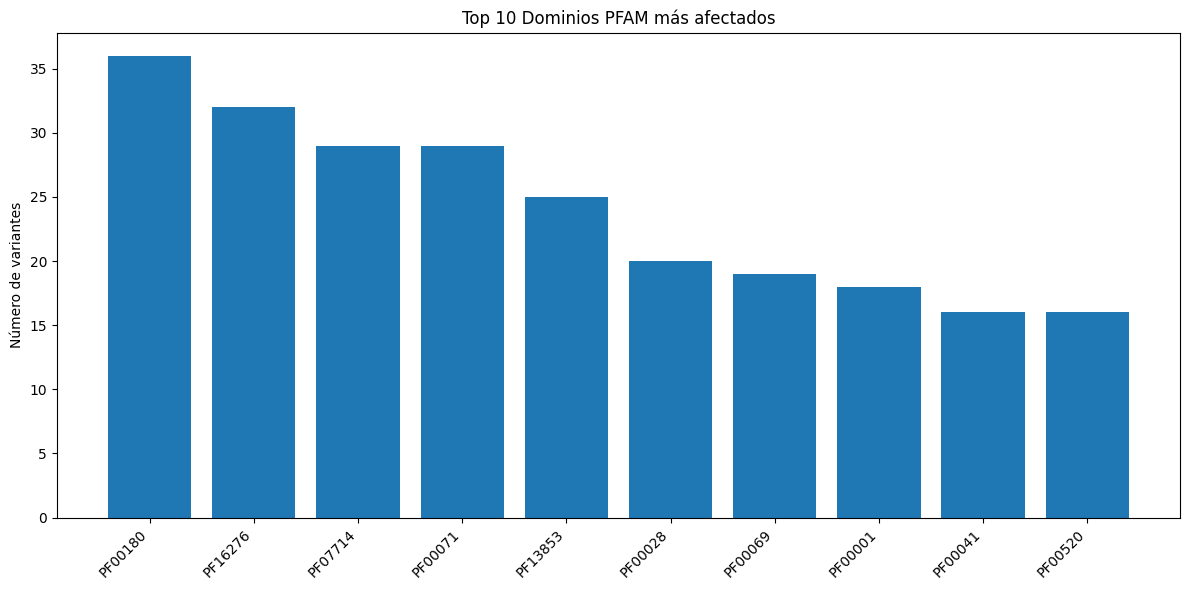

,uniprot,aa_pos,pfam_id,pfam_name,n_variants,n_genes
741,IDHC_HUMAN,132.0,PF00520,PF00520,4,1
607,FLT3_HUMAN,835.0,PF13853,PF13853,3,1
601,FLT3_HUMAN,601.0,PF13853,PF13853,3,1
587,FLT3_HUMAN,593.0,PF17980,PF17980,2,1
423,DNM3A_HUMAN,615.0,PF07678,PF07678,2,1
984,RASK_HUMAN,12.0,PF00443,PF00443,2,1
28,ADCY5_HUMAN,417.0,PF00180,PF00180,2,1
596,FLT3_HUMAN,599.0,PF07714,PF07714,2,1
604,FLT3_HUMAN,604.0,PF13853,PF13853,2,1
742,IDHP_HUMAN,140.0,PF00520,PF00520,2,1


In [3]:
# Resumen por dominio PFAM
pfam_summary = maf_data.pfam_domains(
    summarize_by='PfamDomain',
    top_n=10,
    include_synonymous=False
)

if not pfam_summary.empty:
    display(pfam_summary)

    # Visualización
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(pfam_summary)), pfam_summary['n_variants'])
    plt.xticks(range(len(pfam_summary)), pfam_summary['pfam_name'], rotation=45, ha='right')
    plt.ylabel('Número de variantes')
    plt.title('Top 10 Dominios PFAM más afectados')
    plt.tight_layout()
    plt.show()

# Resumen por posición de aminoácido
aa_summary = maf_data.pfam_domains(
    summarize_by='AAPos',
    top_n=10,
    include_synonymous=False
)

if not aa_summary.empty:
    display(aa_summary)


In [4]:
# Intentar construir la base de datos embebida
print("Configurando base de datos PFAM...")
try:
    # Esto creará la base de datos si no existe
    build_embedded_db(force_rebuild=False)
    print("✓ Base de datos PFAM configurada correctamente")
except Exception as e:
    print(f"⚠️  Error configurando base de datos: {e}")
    print("Continuaremos con las funciones disponibles...")

# Intentar conectar a la base de datos
try:
    db_conn = connect_db()
    print("✓ Conexión a base de datos establecida")

    # Verificar tablas disponibles
    tables = db_conn.execute("SHOW TABLES").fetchall()
    print(f"Tablas disponibles: {[table[0] for table in tables]}")

    db_conn.close()
except Exception as e:
    print(f"⚠️  Error conectando a base de datos: {e}")
    db_conn = None


Configurando base de datos PFAM...
✅ Database already exists at /home/luisruimore/Escritorio/TFG/docs/examples/analysis/../../../src/pyMut/data/resources/data.duckdb
✓ Base de datos PFAM configurada correctamente
✓ Conexión a base de datos establecida
Tablas disponibles: ['meta', 'pfam', 'xref']
